In [31]:
import PIL
from PIL import Image, ImageFilter, ImageEnhance, ImageFont, ImageDraw
from IPython.display import display

In [32]:
# Opening a white image to catch the color:

white = Image.open('nature.jpg')

In [33]:
# Creating an empty list for the images that will be part of the contact sheet:

images = []

In [34]:
# Creating a list of intensities between 0 and 1.

intensity = [0.1, 0.5, 0.9]

In [38]:
# FIRST ROW: 3 blue images (decreasing the reds)

for color in intensity:
    # Open the image and convert to RGB:
    image = Image.open('nature.jpg').convert('RGB')
    
    # There are 3 channels. We have to split them:
    r, g, b = image.split()
    
    # Decreasing the reds:
    r = r.point(lambda i: i * color)
    
    # Recombining back to RGB image
    result = Image.merge('RGB', (r,g,b))
    
    # Resizing the image:
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Creating a new image for the background:
    new = Image.new('RGB', (result.width,30), color = (0,0,0))
    
    # Passing the location of the font and the size:
    font = ImageFont.load_default()
    #font = ImageFont.truetype('FanwoodText-Regular.ttf', 20)
    
    # Instantiating the ImageDraw class passing the new image created:
    draw = ImageDraw.Draw(new)
    
    # Using the text method with the draw object to write the channel and intensity:
    channel = 0
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
              stroke_width = 1, stroke_fill = result.getpixel((0,50)),
              font = font, fill = white.getpixel((0,0)))
    
    # Creating a new image using the objects created above:
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0,result.height))
    sheet.paste(result,(0,0))
    
    # Append the recombined image to the images list
    images.append(sheet)
    

In [51]:
# SECOND ROW: 3 purple images (decreasing the greens)

for color in intensity:
    # Abrindo a imagem e convertendo para RGB:
    image = Image.open('nature.jpg').convert('RGB')
    
    # Existem 3 canais e precisamos separá-los:
    r, g, b = image.split()
    
    # Diminuindo os tons de vermelho:
    g = g.point(lambda i: i*color)
    
    # Recombinando as imagens para RGB:
    
    result = Image.merge('RGB', (r, g, b))
    
    # Redimensionando a imagem:
    
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Criando uma nova imagem para adicionar ao 'lençol':
    
    new = Image.new('RGB', (result.width, 30), color = (0, 0, 0))
    
    # Passando a fonte e seu tamanho:
    
    font = ImageFont.load_default()
    
    # Passando a nova imagem criada para a classe 'ImageDraw':
    
    draw = ImageDraw.Draw(new)
    
    # Usamos o método 'text' junto com o 'draw object' para escrever o canal e sua intensidade:
    
    channel = 1
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
             stroke_width = 1, stroke_fill = result.getpixel((0,50)),
             font = font, fill = white.getpixel((0,0)))
    
    # Criando uma nova imagem utilizando os objetos criados acima:
    
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0, result.height))
    sheet.paste(result, (0,0))
    
    # Dando um append nas imagens recombinadas para a lista:
    
    images.append(sheet)

In [58]:
# THIRD ROW: 3 yellow images (decreasing the blues)

for color in intensity:
    # Abrindo a imagem e convertendo para RGB:
    image = Image.open('nature.jpg').convert('RGB')
    
    # Separando os 3 canais existentes na imagem:
    r, g, b = image.split()
    
    # Diminuindo os tons de vermelho:
    b = b.point(lambda i: i*color)
    
    # Recombinando para RGB:
    result = Image.merge('RGB', (r, g, b))
    
    # Redimensionando a imagem:
    result = result.resize((int(result.width/2), (int(result.height/2))))
    
    # Criando uma nova imagem:
    
    new = Image.new('RGB', (result.width,30), color = (0,0,0))
    
    # Informando a fonte e seu tamanho:
    
    font = ImageFont.load_default()
    
    # Passando a nova imagem criada para o 'ImageDraw':
    
    draw = ImageDraw.Draw(new)
    
    # Usando o modo 'text' através do 'draw object' para escrever o canal e a intensidade:
    
    channel = 2
    draw.text(xy = (10,8), text = f'channel {channel} intensity {color}',
              stroke_width = 1, stroke_fill = result.getpixel((0,50)),
              font = font, fill = white.getpixel((0,0)))
    
    # Criando uma nova imagem utilizando os objetos criados acima:
    
    sheet = Image.new(result.mode, (result.width, result.height + new.height))
    sheet.paste(new, (0,result.height))
    sheet.paste(result,(0,0))
    
    # Dando um append nas imagens recombinadas para a lista:
    
    images.append(sheet)
    
    

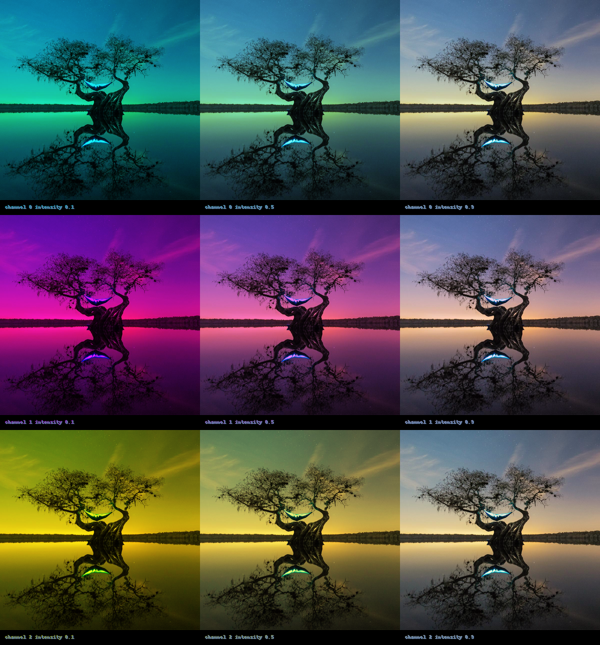

In [60]:
# Agora, vamos criar um 'lençol' a partir de diferentes cores:

first_image = images[0]

# O lençol terá 3X o tamanho da imagem (o lençol será 3X3):

contact_sheet = PIL.Image.new(mode = first_image.mode, size = (first_image.width*3, first_image.height*3))
x=0
y=0

for img in images:
    # Colando cada uma das imagens no nosso 'contact sheet':
    contact_sheet.paste(img, (x,y))
    
    # Atualizando a posição em x:
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height
        
    else:
        x = x + first_image.width
        
# Redimensionando e "printando" na tela nosso lençol pronto:

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2), int(contact_sheet.height/2)))
display(contact_sheet)


        